In this tutorial we will try implement a model that from an input picture can predict if it is a cat image or not. This will be implemented using a multilayer neural network that we will train using a training dataset, afterwards we will evaluate how good this model does using a test dataset. 

Let's first explore the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
import pandas as pd
import h5py #read the h5 file 

In [2]:
# Training dataset: 
input_file = "C:/Users/YsfEss/Desktop/train_catvnoncat.h5"
with h5py.File(input_file,'r') as hdf:
    ls=list(hdf.keys())
    xl=hdf.get('train_set_x')
    yl=hdf.get('train_set_y')
    cl=hdf.get('list_classes')
    imgs=np.array(xl)
    labels=np.array(yl)
    classes=np.array(cl)
print(ls)
print(imgs.shape,labels.shape,classes.shape)

['list_classes', 'train_set_x', 'train_set_y']
(209, 64, 64, 3) (209,) (2,)


In [131]:
# Test dataset:

in_file= "C:/Users/YsfEss/Desktop/test_catvnoncat.h5"
with h5py.File(in_file,'r') as hdf1:
    ls1=list(hdf1.keys())
    xl1=hdf1.get('test_set_x')
    yl1=hdf1.get('test_set_y')
    cl1=hdf1.get('list_classes')
    imgs1=np.array(xl1)
    labels1=np.array(yl1)
ls1

['list_classes', 'test_set_x', 'test_set_y']

As you can see above, we have a 4 dimensional array; we have 209 image (training example) each is 64x64 pixel image with RBG coding (thus the 3). With a (209,1) vector for the labels of each training example (Cat, Non-Cat).

We will now attempt to visualize some images from dataset.

Feel free to change the index of the photo to see different kind of training examples and their respective labels.

b'cat'


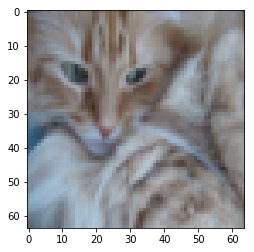

In [3]:
index=2
print(classes[labels[index]])
plt.imshow(imgs[index])
#print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [111]:
n=imgs.shape[0] #Number of observations
p=imgs.shape[1]*imgs.shape[2]*imgs.shape[3] #Number of attributes
data=imgs.reshape(n,p)
dataF=pd.DataFrame(data=data)
dataF=dataF.applymap(lambda x: x/255)
labels=pd.DataFrame(data=labels,columns=['CLASS'])
dataF=pd.concat([dataF,labels],axis=1)
dataF
# The following dataframe represents the RBG coding of each image in the data set.

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,CLASS
0,0.066667,0.121569,0.219608,0.086275,0.129412,0.231373,0.098039,0.137255,0.243137,0.098039,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.768627,0.752941,0.745098,0.756863,0.729412,0.713725,0.737255,0.701961,0.682353,0.835294,...,0.325490,0.321569,0.317647,0.329412,0.321569,0.321569,0.321569,0.313725,0.317647,0
2,0.321569,0.278431,0.266667,0.349020,0.325490,0.325490,0.392157,0.384314,0.407843,0.415686,...,0.603922,0.611765,0.627451,0.572549,0.580392,0.596078,0.541176,0.552941,0.556863,1
3,0.003922,0.086275,0.007843,0.003922,0.054902,0.007843,0.003922,0.050980,0.003922,0.015686,...,0.113725,0.345098,0.196078,0.054902,0.239216,0.101961,0.007843,0.231373,0.007843,0
4,0.035294,0.035294,0.019608,0.039216,0.035294,0.023529,0.035294,0.035294,0.023529,0.035294,...,0.054902,0.082353,0.050980,0.039216,0.062745,0.039216,0.066667,0.121569,0.082353,0
5,0.329412,0.309804,0.196078,0.329412,0.309804,0.200000,0.301961,0.282353,0.172549,0.321569,...,0.254902,0.156863,0.090196,0.227451,0.149020,0.086275,0.219608,0.137255,0.086275,0
6,0.219608,0.223529,0.090196,0.203922,0.215686,0.074510,0.168627,0.207843,0.066667,0.184314,...,0.125490,0.152941,0.039216,0.101961,0.145098,0.035294,0.086275,0.145098,0.039216,0
7,0.074510,0.086275,0.007843,0.090196,0.101961,0.007843,0.105882,0.113725,0.007843,0.117647,...,0.086275,0.078431,0.031373,0.035294,0.039216,0.015686,0.027451,0.031373,0.015686,1
8,0.247059,0.266667,0.239216,0.250980,0.266667,0.235294,0.266667,0.278431,0.227451,0.290196,...,0.027451,0.035294,0.023529,0.027451,0.035294,0.023529,0.027451,0.035294,0.023529,0
9,0.090196,0.184314,0.043137,0.098039,0.196078,0.047059,0.117647,0.207843,0.050980,0.160784,...,0.156863,0.239216,0.058824,0.149020,0.247059,0.050980,0.141176,0.250980,0.043137,0


In [135]:
imgs1.shape

(50, 64, 64, 3)

In [136]:
tdata=imgs1.reshape(50,64*64*3)
teD=pd.DataFrame(data=tdata)
testD=teD.applymap(lambda x: x/255)
labelsT=pd.DataFrame(data=labels1,columns=['CLASS'])
testD=pd.concat([testD,labelsT],axis=1)
testD

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,CLASS
0,0.619608,0.407843,0.325490,0.631373,0.415686,0.333333,0.635294,0.419608,0.329412,0.639216,...,0.647059,0.478431,0.411765,0.662745,0.494118,0.427451,0.678431,0.501961,0.431373,1
1,0.450980,0.431373,0.435294,0.537255,0.505882,0.505882,0.607843,0.572549,0.568627,0.623529,...,0.831373,0.843137,0.862745,0.752941,0.768627,0.796078,0.670588,0.690196,0.729412,1
2,1.000000,0.992157,0.996078,1.000000,0.992157,0.996078,1.000000,0.992157,0.996078,1.000000,...,0.576471,0.470588,0.490196,0.556863,0.431373,0.462745,0.521569,0.396078,0.474510,1
3,0.996078,0.996078,0.952941,1.000000,1.000000,0.964706,1.000000,1.000000,0.992157,1.000000,...,0.498039,0.317647,0.156863,0.470588,0.301961,0.149020,0.505882,0.329412,0.168627,1
4,0.376471,0.282353,0.243137,0.384314,0.290196,0.247059,0.396078,0.301961,0.258824,0.411765,...,0.615686,0.564706,0.564706,0.600000,0.549020,0.552941,0.572549,0.517647,0.517647,1
5,0.101961,0.207843,0.117647,0.113725,0.227451,0.125490,0.125490,0.239216,0.133333,0.133333,...,0.278431,0.392157,0.274510,0.254902,0.368627,0.258824,0.196078,0.286275,0.200000,0
6,0.937255,1.000000,1.000000,0.941176,1.000000,1.000000,0.945098,1.000000,1.000000,0.945098,...,0.584314,0.560784,0.517647,0.992157,0.992157,0.988235,1.000000,1.000000,1.000000,1
7,0.925490,0.949020,0.866667,0.945098,0.968627,0.874510,0.968627,0.980392,0.925490,0.843137,...,0.133333,0.298039,0.466667,0.125490,0.286275,0.454902,0.109804,0.270588,0.450980,1
8,0.074510,0.094118,0.109804,0.074510,0.094118,0.109804,0.078431,0.098039,0.113725,0.078431,...,0.380392,0.407843,0.454902,0.415686,0.403922,0.388235,0.227451,0.239216,0.223529,1
9,0.905882,0.847059,0.854902,0.901961,0.835294,0.847059,0.901961,0.847059,0.847059,0.890196,...,0.525490,0.533333,0.513725,0.501961,0.505882,0.482353,0.466667,0.462745,0.443137,1


In [139]:
list(dataF[output]).count(1)

72

In [140]:
dataF=dataF.sample(frac=1)

In [113]:
train=dataF[0:150]
test=dataF[150:209]

In [42]:
def crossValidation(d,K):
    m=d.shape[0]
    s=m//K
    test={}
    train={}
    for i in range (K):
        test[i]=d[i*s:(i+1)*s]
        train[i]=pd.concat([test[i],d]).drop_duplicates(keep=False)
    return(train,test)

In [43]:
train,test=crossValidation(dataF,5)

In [47]:
features=list(train[0].columns)
features.remove('CLASS')
output=list(train[0].columns)[12288]
len(features)

12288

In [75]:
def learnTest(train,test,paramaters):
    solv=parameters[0] #string eg. sgd, adam, etc..
    hLay=parameters[1] #tuple eg. (2,2,) 2 layers with 2 neurones each 
    acti=parameters[2] # string eg. logistic, tanh, Relu
    testaccuracy=0
    trainaccuracy=0
    K=len(train.keys())
    for k in range (K):
        print(k,': Start')
        #Model fitting:
        
        classif=MLPClassifier(solver=solv,hidden_layer_sizes=hLay,activation=acti,max_iter=3000)
        classif.fit(train[k][features],train[k][output])
        
        print('Halfway there')
        #Model evaluation:
        
        predictions=classif.predict(test[k][features])
        trainpred=classif.predict(train[k][features])
        trainaccuracy+=[trainpred[i]==list(train[k][output])[i] for i in range(len(trainpred))].count(True)/len(trainpred)
        testaccuracy+=[predictions[i]==list(test[k][output])[i] for i in range(len(predictions))].count(True)/len(predictions)
        print('Done')
    testaccuracy/=K
    trainaccuracy/=K
    return(trainaccuracy*100,testaccuracy*100)

In [116]:
def learn(train,test,parameters):
    TrAcc=0
    TeAcc=0
    solv=parameters[0] #string eg. sgd, adam, etc..
    hLay=parameters[1] #tuple eg. (2,2,) 2 layers with 2 neurones each 
    acti=parameters[2] # string eg. logistic, tanh, Relu
    classif=MLPClassifier(solver=solv,hidden_layer_sizes=hLay,activation=acti,max_iter=3000)
    classif.fit(train[features],train[output])
    Trpred=classif.predict(train[features])
    Tepred=classif.predict(test[features])
    TrAcc=[Trpred[i]==list(train[output])[i] for i in range (len(Trpred))].count(True)/len(Trpred)
    TeAcc=[Tepred[i]==list(test[output])[i] for i in range (len(Tepred))].count(True)/len(Tepred)
    return(100*TrAcc,100*TeAcc)

In [145]:
parameters=['sgd',(100,),'tanh']
learn(dataF,testD,parameters)

(100.0, 70.0)

In [146]:
parameters=['sgd',(100,100,100,),'tanh']
learn(dataF,testD,parameters)

(100.0, 72.0)

In [147]:
parameters=['sgd',(100,50,20,),'tanh']
learn(dataF,testD,parameters)

(100.0, 74.0)

In [148]:
parameters=['sgd',(100,50,20,10,5,),'tanh']
learn(dataF,testD,parameters)

(99.04306220095694, 74.0)

In [105]:
list(dataF[output]).count(1)

72

#### Scenario 1:

We'll start simply with a network with 1 hidden layer and same number of hidden layers as the input layer, we'll also use stochastic gradient descent as a solver and the logistic function as activation.

In [80]:
parameters=['sgd',(1000,),'logistic']
learnTest(train,test,parameters)

0 : Start


C:\Users\YsfEss\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Halfway there
Done
1 : Start


C:\Users\YsfEss\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Halfway there
Done
2 : Start


C:\Users\YsfEss\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Halfway there
Done
3 : Start


C:\Users\YsfEss\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Halfway there
Done
4 : Start


C:\Users\YsfEss\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Halfway there
Done


(66.1904761904762, 62.926829268292686)

both the training and test errors are quite high let's modify parameters and see what happens.

In [71]:
parameters=['sgd',(1000,1000,1000,1000),'logistic']
learnTest(train,test,parameters)

0 : Start
Halfway there
Done
1 : Start
Halfway there
Done
2 : Start
Halfway there
Done
3 : Start
Halfway there
Done
4 : Start
Halfway there
Done


(65.59523809523809, 65.3658536585366)